# Lab 13: Frequency Response

## Setup and Constants
Fill in the constraints required for the model. The spring constant, *k<sub>s</sub>*, was determined in Lab 4 to be ~0.2 Nm/rad

In [7]:
%matplotlib widget
from matplotlib.pyplot import figure, xlabel, ylabel, legend, show, title, subplot, semilogx
from control.matlab import tf, bode
from control.lti import damp
from numpy import log10, array
from math import pi

In [8]:
ks = 0.2 # N-m/rad
J = 1.29e-5 # kg-m^2
kt = 0.5 # N-m/A
b = 2e-4 # N-m-s
kdr = 180/pi # deg/rad
s = tf('s')

## Initial Estimates Transfer Function

Use the values aboe to create an open loop transfer function, G, for the plant. You can verify your transfer function by checking the poles. They should be $-7.75 ± 124.3i$

In [9]:
G = kdr*kt/(J*s**2+b*s+ks)
_ = damp(G)

    Eigenvalue (pole)       Damping     Frequency
    -7.752    +124.3j       0.06226         124.5
    -7.752    -124.3j       0.06226         124.5


## Bode Plots - Initial Estimates

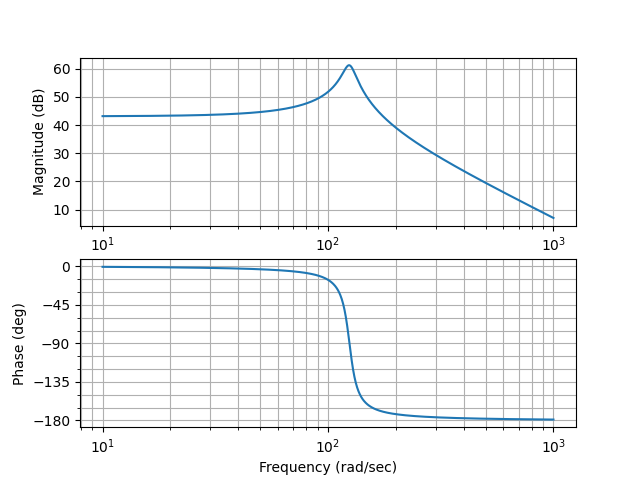

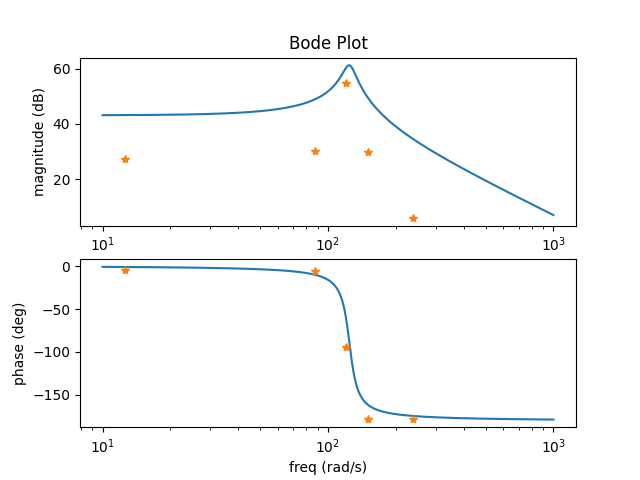

In [10]:
figure()
bode(G) # Do the graph
show()

m, p, w = bode(G) # Collect the magnitude, phase and
                  # frequency vector from the bode plot           
                 
m = 20 * log10(m) # convert to dB - note we use "log10()"
p = (180 / pi) * p # Convert radians to degrees

# experimental data points from Data Table in lab handout
fdata = array([19.18, 2, 14, 24, 38]) # experimental frequencies
wdata = fdata * 2 * pi # convert Hz to rad/s
magdata = array([54.6479, 27.2346, 30.3703, 29.8272, 6.0206]) # experimental mag ratio
phdata = array([-94, -4.3, -5.9, -178, -178]) # experimental phase

figure()
subplot(2, 1, 1)
semilogx(w, m, wdata, magdata, '*')
title('Bode Plot') 
ylabel('magnitude (dB)') 
xlabel('freq (rad/s)')

subplot(2, 1, 2) 
semilogx(w, p, wdata, phdata, '*')
ylabel('phase (deg)') 
xlabel('freq (rad/s)')
show()

## Bode plots - Improved Estimates

Given the natural frequency and dc gain derived from the table, construct a new transfer function, that will hopefully better match the data.

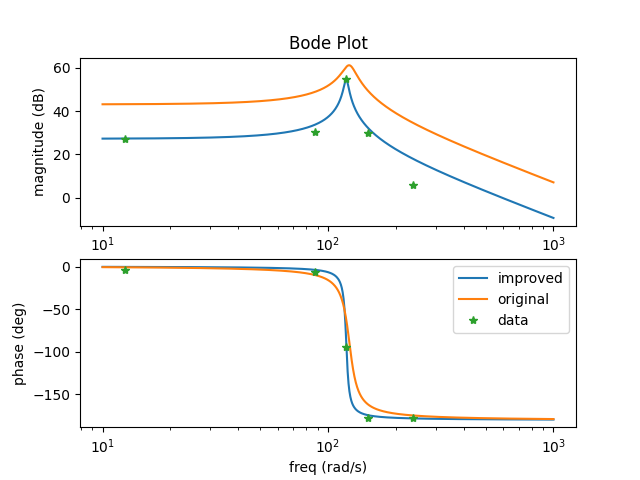

In [11]:
wn = 19.18*2*pi # natural freq from data (rad/s)
Kdc = 23 # dc gain from data in deg/Amp
Mwn = 540 # magnitude ratio at wn from data in deg/Amp
zeta = Kdc/Mwn/2 # calculate damping ratio using Mwn and Kdc

# put your Gnew here
Gnew = (Kdc*wn**2) / (s**2 + 2*zeta*wn*s + wn**2)
 
mnew, pnew, wnew = bode(Gnew) # get magnitude, phase, and freq data
mnew = 20 * log10(mnew)
pnew = (180 / pi) * pnew # Convert radians to degrees
 
# plot two models and data similar to prior plot before, but
# with mnew & pnew added in
figure()
subplot(2, 1, 1)
semilogx(wnew, mnew, w, m, wdata, magdata, '*')
title('Bode Plot')
ylabel('magnitude (dB)')
xlabel('freq (rad/s)')

subplot(2, 1, 2); 
semilogx(wnew, pnew, w, p, wdata, phdata, '*')
ylabel('phase (deg)');
xlabel('freq (rad/s)')
legend(['improved', 'original', 'data'])
show()

## Better estimates
Find an improved, new *k<sub>s</sub>*, *b*, and *k<sub>t</sub>* using &#969;<sub>n</sub>, *J*, and &#950; and the governing equations in the handout (hint: they should not be orders of magnitude different)

In [12]:
ksnew = wn**2*J              # N-m/rad
bnew = 2*zeta*wn*J          # N-m-s/rad
ktnew = (Kdc*wn**2*J)/kdr    # N-m/A
print("ksnew: {}, bnew: {}, ktnew: {}".format(ksnew, bnew, ktnew))

ksnew: 0.1873469609968921, bnew: 6.621437097533095e-05, ktnew: 0.07520589019902679
